In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df = pd.read_csv("./artifacts/raw/data.csv")

In [3]:
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [4]:
df.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

In [5]:
df.shape

(167497, 28)

In [6]:
for col in df.columns:
    print(f"{col} Values: ")
    print(df[col].value_counts())
    print("----" * 20)

Patient_ID Values: 
Patient_ID
167497    1
1         1
2         1
3         1
4         1
         ..
14        1
13        1
12        1
11        1
10        1
Name: count, Length: 167497, dtype: int64
--------------------------------------------------------------------------------
Country Values: 
Country
USA             25927
China           17525
South Korea     14107
Japan           13924
UK              12276
Germany         12258
India           10479
France          10426
Brazil          10399
Canada           8819
Italy            8795
Australia        6877
South Africa     5172
Nigeria          3551
Pakistan         3549
New Zealand      3413
Name: count, dtype: int64
--------------------------------------------------------------------------------
Age Values: 
Age
74    4256
70    4242
87    4223
65    4221
71    4216
68    4202
50    4188
63    4185
76    4175
61    4174
75    4174
77    4171
84    4170
57    4169
58    4168
55    4164
88    4163
54    4161
79    4158
83  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [8]:
df.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [9]:
plt.style.use('default')

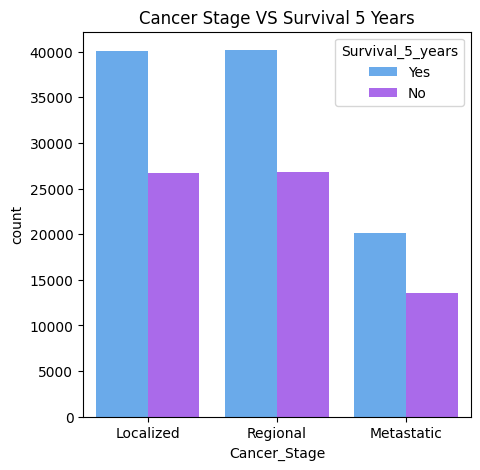

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x="Cancer_Stage" , hue="Survival_5_years" , data=df , palette="cool")
plt.title("Cancer Stage VS Survival 5 Years")
plt.show()

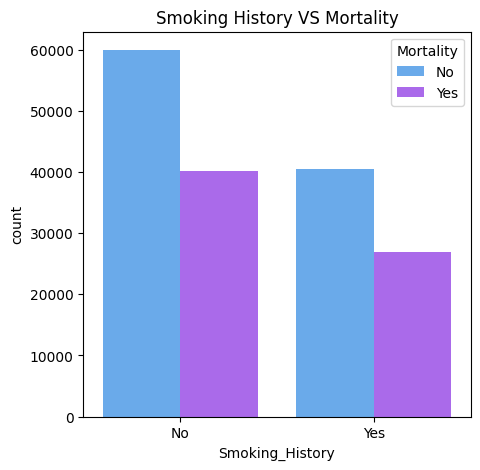

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x="Smoking_History" , hue="Mortality" , data=df , palette="cool")
plt.title("Smoking History VS Mortality")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_32480\57338937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancer_Stage" , y="Tumor_Size_mm" , data=df ,palette="cool" )


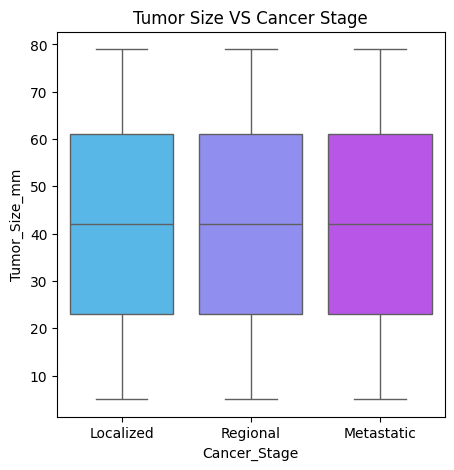

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Cancer_Stage" , y="Tumor_Size_mm" , data=df ,palette="cool" )
plt.title("Tumor Size VS Cancer Stage")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_32480\1036813622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survival_Prediction" , y="Healthcare_Costs" , data=df ,palette="cool" )


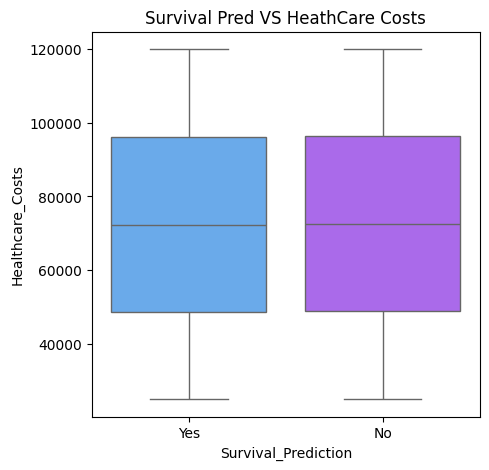

In [13]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Survival_Prediction" , y="Healthcare_Costs" , data=df ,palette="cool" )
plt.title("Survival Pred VS HeathCare Costs")
plt.show()

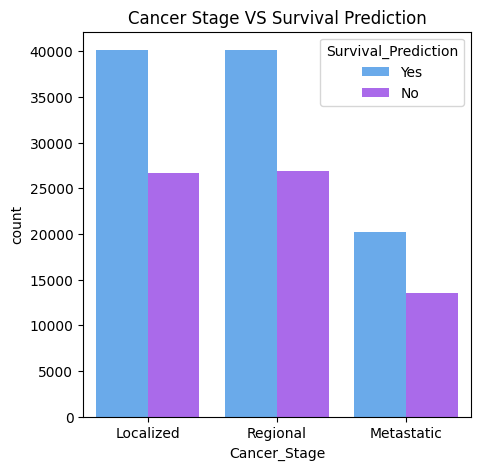

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x="Cancer_Stage" , hue="Survival_Prediction" , data=df , palette="cool")
plt.title("Cancer Stage VS Survival Prediction")
plt.show()

In [15]:
df = df.drop(columns=['Patient_ID'])

In [16]:
X = df.drop(columns=['Survival_Prediction'])
Y = df["Survival_Prediction"]

In [17]:
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X,Y , test_size=0.2 , random_state=42)

In [19]:
X_cat = X_train.select_dtypes(include=['int64' , 'float64'])
chi2_selector = SelectKBest(score_func=chi2 , k="all")
chi2_selector.fit(X_cat,y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x000001AF25CAECA0>)

In [20]:
chi2_scores = pd.DataFrame({
    'Feature' : X_cat.columns,
    "Chi2 Score" : chi2_selector.scores_
}).sort_values(by='Chi2 Score' , ascending=False)

In [21]:
chi2_scores

,Feature,Chi2 Score
19,Healthcare_Costs,2097.430133
4,Tumor_Size_mm,7.971461
16,Treatment_Type,4.987144
11,Diabetes,2.103967
21,Mortality_Rate_per_100K,1.963077
25,Insurance_Status,1.464241
3,Cancer_Stage,1.281849
14,Screening_History,1.159519
0,Country,0.883425
24,Healthcare_Access,0.713346


In [22]:
X_train , X_test , y_train , y_test = train_test_split(X,Y , test_size=0.2 , random_state=42 , stratify=Y)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
RF = RandomForestClassifier(random_state=42)
GB = GradientBoostingClassifier(random_state=42)

In [25]:
RSV = RandomizedSearchCV(estimator=RF , param_distributions={
    'n_estimators' : [100,200,300,400,500],
    'max_depth' : [None,5,10,15,20],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['auto', 'sqrt', 'log2']
} , n_iter=10 , cv=3 , verbose=2 , random_state=42 , n_jobs=-1)
RSV.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\PC\anaconda3\envs\PTENV\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\anaconda3\envs\PTENV\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\anaconda3\envs\PTENV\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\PC\anaconda3\envs\PTENV\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\PC\a

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [26]:
RSV.best_score_

np.float64(0.5996328276674104)

In [28]:
RSV_2 = RandomizedSearchCV(estimator=GB , param_distributions={
    'n_estimators' : [100,200,300,400,500],
    'max_depth' : [None,5,10,15,20],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['auto', 'sqrt', 'log2']
} , n_iter=1 , cv=3 , verbose=2 , random_state=99 , n_jobs=-1)
RSV_2.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=99, verbose=2)

In [29]:
y_pred = RSV.predict(X_test)

In [30]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          No       0.00      0.00      0.00     13412
         Yes       0.60      1.00      0.75     20088

    accuracy                           0.60     33500
   macro avg       0.30      0.50      0.37     33500
weighted avg       0.36      0.60      0.45     33500



c:\Users\PC\anaconda3\envs\PTENV\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\anaconda3\envs\PTENV\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\anaconda3\envs\PTENV\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
acc = RSV_2.best_score_

In [32]:
print(acc)

0.5797368616272465


In [33]:
y_pred = RSV_2.predict(X_test)

In [34]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          No       0.40      0.10      0.17     13412
         Yes       0.60      0.90      0.72     20088

    accuracy                           0.58     33500
   macro avg       0.50      0.50      0.44     33500
weighted avg       0.52      0.58      0.50     33500

